### SMOTE - Synthetic Minority Oversampling Technique

- SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

In [1]:
from sklearn.datasets import make_classification


In [2]:
X,y = make_classification(n_samples=1000, n_features=2, n_redundant= 0, n_clusters_per_class=1,
                   weights=[0.90],random_state=12)

In [3]:
X.shape

(1000, 2)

In [4]:
X, y

(array([[-0.76289759, -0.70680807],
        [-1.07543571, -1.0511621 ],
        [-0.61011459, -0.90980157],
        ...,
        [-1.32643852, -1.815178  ],
        [-0.83348573, -0.5146474 ],
        [-0.30287558, -0.57597532]]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [5]:
import pandas as pd

In [6]:
df1 = pd.DataFrame(X, columns=['f1', 'f2'])

In [7]:
df2 = pd.DataFrame(y, columns=['target'])

In [8]:
df = pd.concat([df1, df2], axis=1)

In [9]:
df

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0
...,...,...,...
995,-0.712495,-0.880452,0
996,-2.625830,-2.827891,0
997,-1.326439,-1.815178,0
998,-0.833486,-0.514647,0


In [10]:
import matplotlib.pyplot as plt

In [11]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

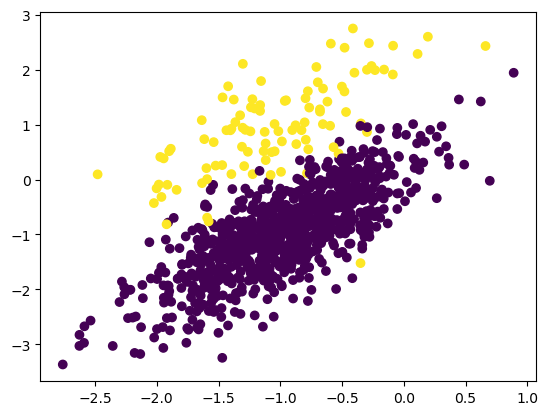

In [12]:
x= df['f1']
y = df['f2']
plt.scatter(x, y, c = df['target'])

In [13]:
%pip install imblearn 

Note: you may need to restart the kernel to use updated packages.


In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
# Transforming the data points 
oversample = SMOTE()

X,y = oversample.fit_resample(df[['f1', 'f2']], df['target'] )

In [16]:
over_y = pd.DataFrame(y, columns=['target'])
over_X = pd.DataFrame(X, columns=["f1", 'f2'])
over_df = pd.concat([over_X, over_y], axis=1)

In [17]:
over_df['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

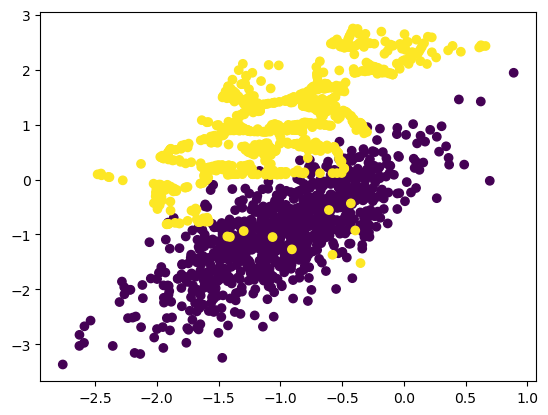

In [18]:
plt.scatter(over_df['f1'], over_df['f2'], c = over_df.target)

## Data Interpolation
Data interpolation is the process of estimating unknown values within a dataset based on the known values. In Python, there are various libraries available that can be used for data interpolation, such as NumPy, SciPy, and Pandas. Here is an example of how to perform data interpolation using the NumPy library:

1. Linear Interpolation
2. Cubic Interpolation With Scipy
3. Polynomial Interpolation

In [19]:
import pandas as pd
import numpy as np

1. Linear Interpolation 

In [20]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

In [21]:
import matplotlib.pyplot as plt 

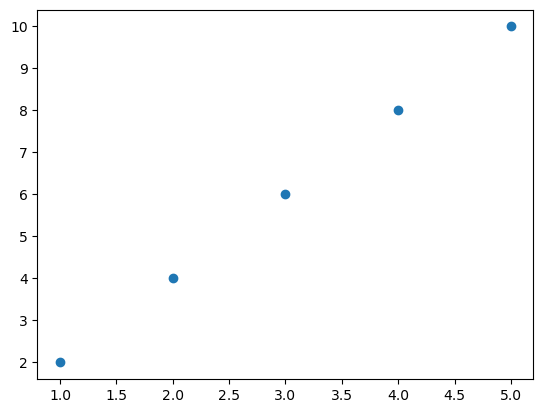

In [22]:
plt.scatter(x, y)

In [23]:
# interpolate the data with numpy 
x_new = np.linspace(1,5,20)  # the 20 number here means number of values in the interwal
y_interpolated = np.interp(x_new, x, y)  # here we have passed the three values, first value is x values along 
# along which we want to interpolate the values and x, and y are reference values 


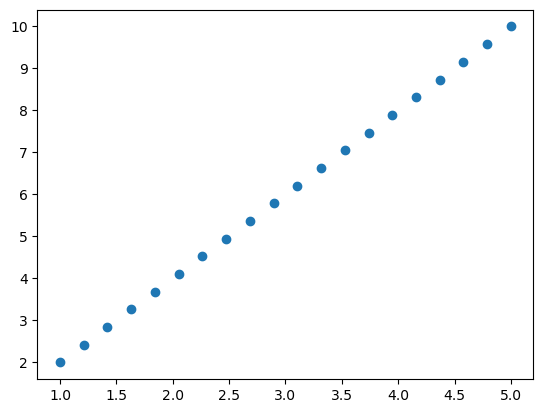

In [24]:
plt.scatter(x_new, y_interpolated)

2. Cubic interpolation with Scipy


In [41]:
from scipy.interpolate import interp1d

x = np.array([1, 2, 3, 4,5,6,7,8,9])
y = np.array([1, 8,27,64,125,64,27,8,1])

In [42]:
# lets create a cubic interpolation function 
f = interp1d(x, y, kind='cubic')

In [45]:
x_new = np.linspace(1,9,18)
y_interpolated = f(x_new)

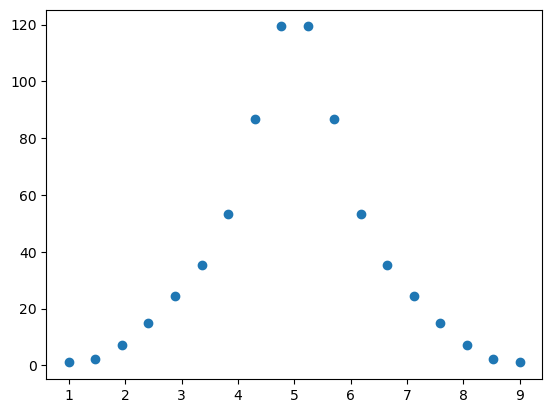

In [46]:
plt.scatter(x_new, y_interpolated)

3. Polynomial interpolation 

In [47]:
# we can implement it from numpy directly and can be used for any degree of polynomial 

# create some sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 4, 9, 16, 25])

In [48]:
# interpolate the data using polynomial interpolation
p=np.polyfit(x,y,2)

In [49]:
x_new = np.linspace(1, 5, 10) # create new x values
y_interp = np.polyval(p, x_new) # interpolate y values

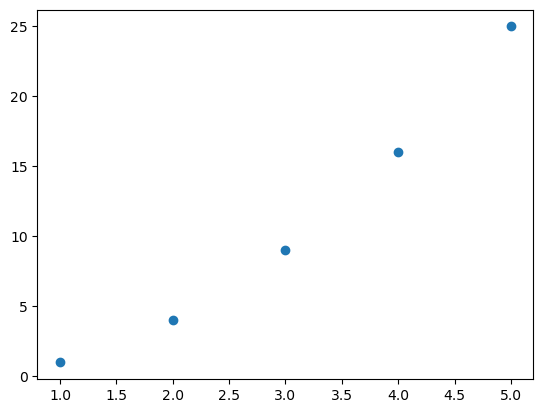

In [50]:
plt.scatter(x,y)

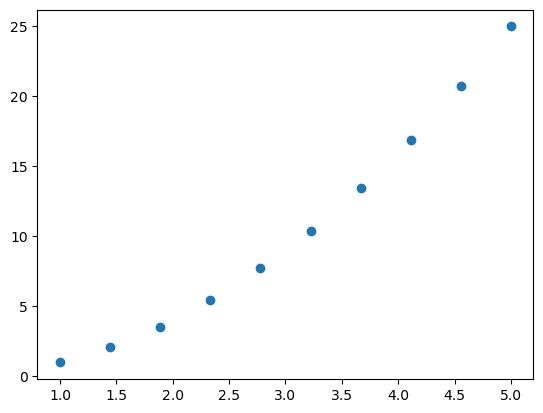

In [51]:
plt.scatter(x_new,y_interp)


In [52]:
# this is also a good option for curve fitting 